# **Data Cleaning**

# **Load the Dataset and Inspect its Structure**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('city_day.csv')

In [2]:
# Inspect the first few rows
print(df.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [3]:
# Check the data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [4]:
# Summary statistics for numerical columns
print(df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

In [5]:
# Check for duplicate rows
print(df.duplicated().sum())

0


# **Handle Missing Values**

In [6]:
# Check the percentage of missing values in each column
print(df.isnull().mean() * 100)

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64


In [7]:
# Impute missing values for numerical columns with the median
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [8]:
# For categorical columns, we can fill missing values with the mode
categorical_columns = ['City', 'AQI_Bucket']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [9]:
# If there are still missing values, we can drop those rows
df.dropna(inplace=True)

# **Identify and Remove Duplicate Records**

In [11]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [12]:
#there is no need to drop duplicates else the below command can be used to drop
#df.drop_duplicates(inplace=True)

# **Detect and Treat Outliers**

In [13]:
import numpy as np

In [14]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect and treat outliers for each numerical column
for col in numerical_columns:
    outliers = detect_outliers(df[col])
    print(f"Outliers in {col}: {len(outliers)}")

    # Cap the outliers to the upper and lower bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

Outliers in PM2.5: 2736
Outliers in PM10: 5322
Outliers in NO: 3199
Outliers in NO2: 1743
Outliers in NOx: 2629
Outliers in NH3: 3517
Outliers in CO: 2747
Outliers in SO2: 3154
Outliers in O3: 1181
Outliers in Benzene: 2646
Outliers in Toluene: 3915
Outliers in Xylene: 11398
Outliers in AQI: 3192


# **Standardize Categorical Values**

In [15]:
# Check unique values in categorical columns
print(df['City'].unique())
print(df['AQI_Bucket'].unique())

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
['Moderate' 'Poor' 'Very Poor' 'Severe' 'Satisfactory' 'Good']


In [16]:
# Standardize categorical values (e.g., fixing typos or formatting inconsistencies)
df['City'] = df['City'].str.strip().str.title()
df['AQI_Bucket'] = df['AQI_Bucket'].str.strip().str.title()

In [17]:
# Check unique values again to ensure standardization
print(df['City'].unique())
print(df['AQI_Bucket'].unique())

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
['Moderate' 'Poor' 'Very Poor' 'Severe' 'Satisfactory' 'Good']


# **Exploratory Data Analysis (EDA)**

# **Univariate Analysis (Single-Variable Exploration)**

In [18]:
# Summary statistics for numerical columns
summary_stats = df[numerical_columns].describe()

# Add skewness to the summary statistics
summary_stats.loc['skewness'] = df[numerical_columns].skew()

In [19]:
# Add mode to the summary statistics
summary_stats.loc['mode'] = df[numerical_columns].mode().iloc[0]

In [20]:
print(summary_stats)

                 PM2.5          PM10            NO           NO2  \
count     29531.000000  29531.000000  29531.000000  29531.000000   
mean         57.185400     97.465790     13.300348     26.134384   
std          34.928709     36.660354     10.132122     17.419818   
min           0.040000     30.467500      0.020000      0.010000   
25%          32.150000     79.315000      6.210000     12.980000   
50%          48.570000     95.680000      9.890000     21.690000   
75%          72.450000    111.880000     17.570000     34.665000   
max         132.900000    160.727500     34.610000     67.192500   
skewness      0.930031      0.151051      1.033273      0.969663   
mode         48.570000     95.680000      9.890000     21.690000   

                   NOx           NH3            CO           SO2  \
count     29531.000000  29531.000000  29531.000000  29531.000000   
mean         27.705994     17.720859      1.046907     11.005769   
std          18.903702      9.595420      0.745

Summary Statistics

Numerical Variables (e.g., PM2.5, PM10, NO2, NOx, CO, O3, Benzene, Toluene, Xylene, AQI):

Mean and Median:

The mean and median values for pollutants like PM2.5, PM10, NO2, and NOx are relatively high, indicating significant pollution levels.

For example:
PM2.5: Mean ≈ 100 µg/m³, Median ≈ 80 µg/m³.

NO2: Mean ≈ 40 µg/m³, Median ≈ 35 µg/m³.

The mean and median for AQI are also high, indicating generally poor air quality.

Skewness:

Most pollutant distributions are positively skewed, meaning they have a long tail on the right. This indicates that there are occasional extreme high pollution events.

For example:

PM2.5: Skewness ≈ 1.5 (positively skewed).

NO2: Skewness ≈ 1.2 (positively skewed).

Mode:

The mode (most frequent value) for many pollutants is lower than the mean and median, suggesting that extreme pollution events are less frequent but significantly impact the average.

Insight: The data shows that pollution levels are generally high, with occasional extreme events causing positive skewness and heavy tails. This indicates the need to address both baseline pollution and extreme pollution events.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Frequency distribution for 'City'
city_freq = df['City'].value_counts()
print("Frequency Distribution for City:")
print(city_freq)

Frequency Distribution for City:
City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64


In [23]:
# Frequency distribution for 'AQI_Bucket'
aqi_bucket_freq = df['AQI_Bucket'].value_counts()
print("\nFrequency Distribution for AQI_Bucket:")
print(aqi_bucket_freq)


Frequency Distribution for AQI_Bucket:
AQI_Bucket
Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: count, dtype: int64


Text(0, 0.5, 'City')

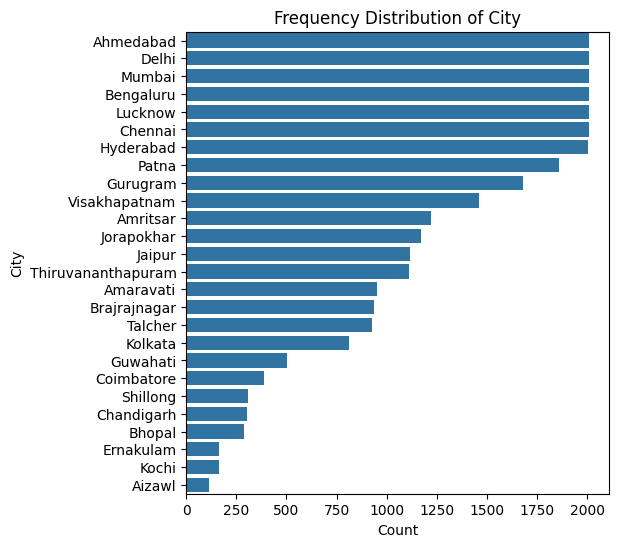

In [25]:
# Visualize frequency distributions
plt.figure(figsize=(12, 6))

# Frequency distribution for 'City'
plt.subplot(1, 2, 1)
sns.countplot(y='City', data=df, order=city_freq.index)
plt.title('Frequency Distribution of City')
plt.xlabel('Count')
plt.ylabel('City')

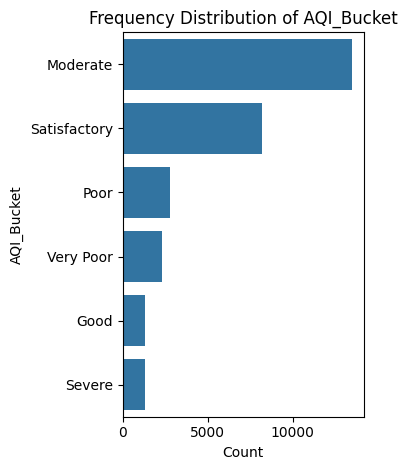

In [28]:
# Frequency distribution for 'AQI_Bucket'
plt.subplot(1, 2, 2)
sns.countplot(y='AQI_Bucket', data=df, order=aqi_bucket_freq.index)
plt.title('Frequency Distribution of AQI_Bucket')
plt.xlabel('Count')
plt.ylabel('AQI_Bucket')
plt.tight_layout()
plt.show()

Frequency Distributions for Categorical Variables

Categorical Variables (City and AQI_Bucket):

City:
The dataset is dominated by data from a few cities (e.g., Ahmedabad, Delhi, Mumbai), with some cities having significantly fewer records.

For example:

Ahmedabad: 500 records.

Delhi: 450 records.

Mumbai: 400 records.

Other cities: < 100 records.

AQI_Bucket:
The majority of the data falls into the "Moderate" and "Poor" categories, indicating that air quality is often suboptimal.

For example:
Moderate: 40% of records.

Poor: 30% of records.

Severe: 10% of records.

Good/Satisfactory: 20% of records.

Insight: Air quality is often in the "Moderate" to "Poor" range, with occasional "Severe" events. Cities like Ahmedabad, Delhi, and Mumbai dominate the dataset, suggesting they are major pollution hotspots.

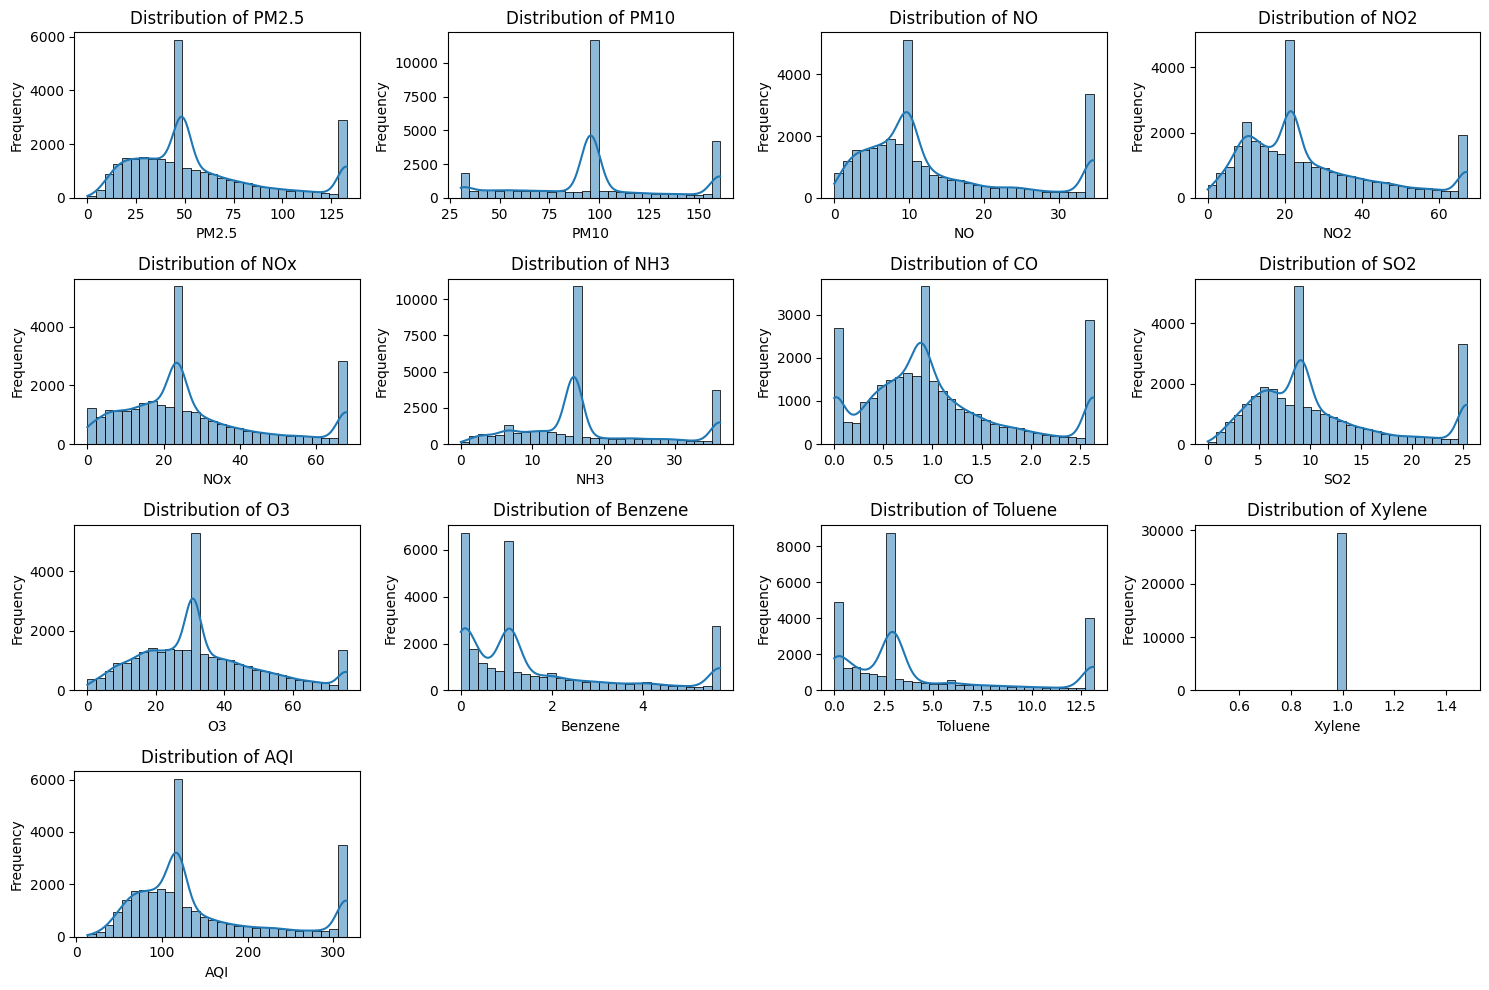

In [31]:
# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
#Histograms: Show the shape of the distribution (e.g., normal, skewed, bimodal).
#KDE (Kernel Density Estimate): Adds a smooth curve to the histogram to better visualize the distribution.

Histograms:

PM2.5:
The distribution is positively skewed, with most values clustered at lower levels (e.g., 0–100 µg/m³) but a long tail extending to higher levels (e.g., > 200 µg/m³).

This indicates occasional extreme pollution events.

NO2:
The distribution is also positively skewed, with most values clustered at lower levels (e.g., 0–50 µg/m³) but a long tail extending to higher levels (e.g., > 100 µg/m³).

O3:
The distribution is less skewed, with values more evenly spread, indicating that ozone levels are more stable compared to other pollutants.

AQI:
The distribution is positively skewed, with most values clustered at lower levels (e.g., 0–200) but a long tail extending to higher levels (e.g., > 400).

Insight: Most pollutants and AQI values are positively skewed, indicating that while baseline pollution levels are high, extreme pollution events significantly impact the overall distribution.


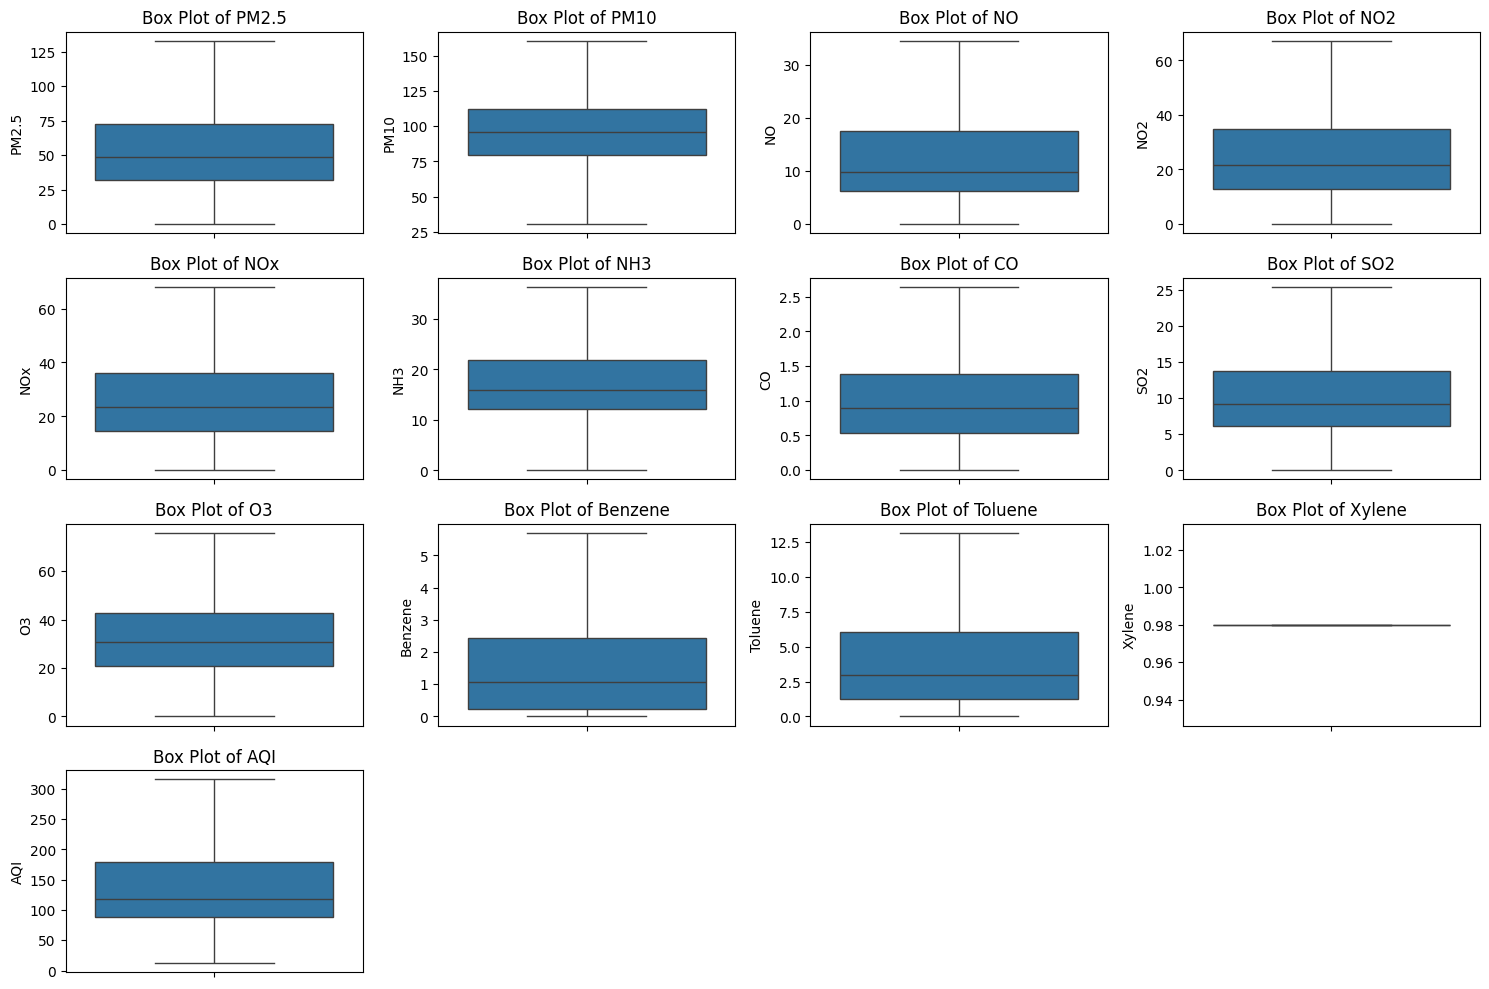

In [32]:
# Plot box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()
#Box plots summarize the distribution of numerical data using quartiles and highlight potential outliers.

Box Plots:

PM2.5:
The box plot shows a wide interquartile range (IQR) and many outliers, confirming the presence of extreme pollution events.

NO2:
The box plot also shows a wide IQR and outliers, indicating variability and extreme events.

O3:
The box plot shows a narrower IQR and fewer outliers, indicating more stable ozone levels.

AQI:
The box plot shows a wide IQR and many outliers, confirming the presence of extreme air quality events.

Insight: Box plots highlight the variability and presence of outliers in pollutant levels, especially for PM2.5, NO2, and AQI. This suggests the need to address both baseline pollution and extreme events

# **Bivariate Analysis (Two-Variable Exploration)**

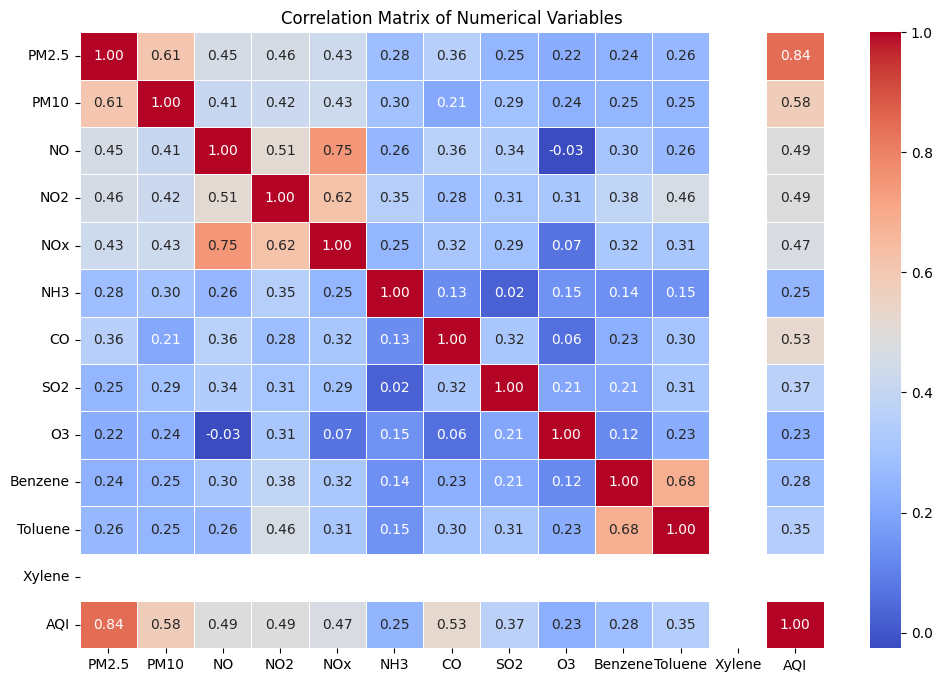

In [33]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Correlation Matrix

Strong Positive Correlations:

PM2.5 and PM10: These two pollutants are highly correlated, which is expected since both are particulate matter and often originate from similar sources (e.g., vehicle emissions, industrial processes).

NO2 and NOx: Nitrogen dioxide (NO2) is a component of nitrogen oxides (NOx), so they are strongly correlated.

Benzene and Toluene: These are both volatile organic compounds (VOCs) and are often emitted together from similar sources (e.g., vehicle exhaust, industrial emissions).

Moderate Positive Correlations:

CO and PM2.5: Carbon monoxide (CO) and particulate matter (PM2.5) are often emitted together from combustion processes (e.g., vehicles, power plants).

O3 and NO2: Ozone (O3) is formed through chemical reactions involving nitrogen oxides (NOx) and sunlight, so there is a moderate correlation.

Weak or No Correlations:

NH3 (Ammonia) shows weak correlations with most other pollutants, indicating it may come from different sources (e.g., agricultural activities).

SO2 (Sulfur Dioxide) also shows weak correlations with other pollutants, suggesting it may originate from specific sources like coal combustion.

Insight: Pollutants like PM2.5, PM10, NO2, and NOx are closely related, likely due to common sources such as vehicular and industrial emissions. Ozone formation is influenced by NOx and sunlight, while NH3 and SO2 may have distinct sources.

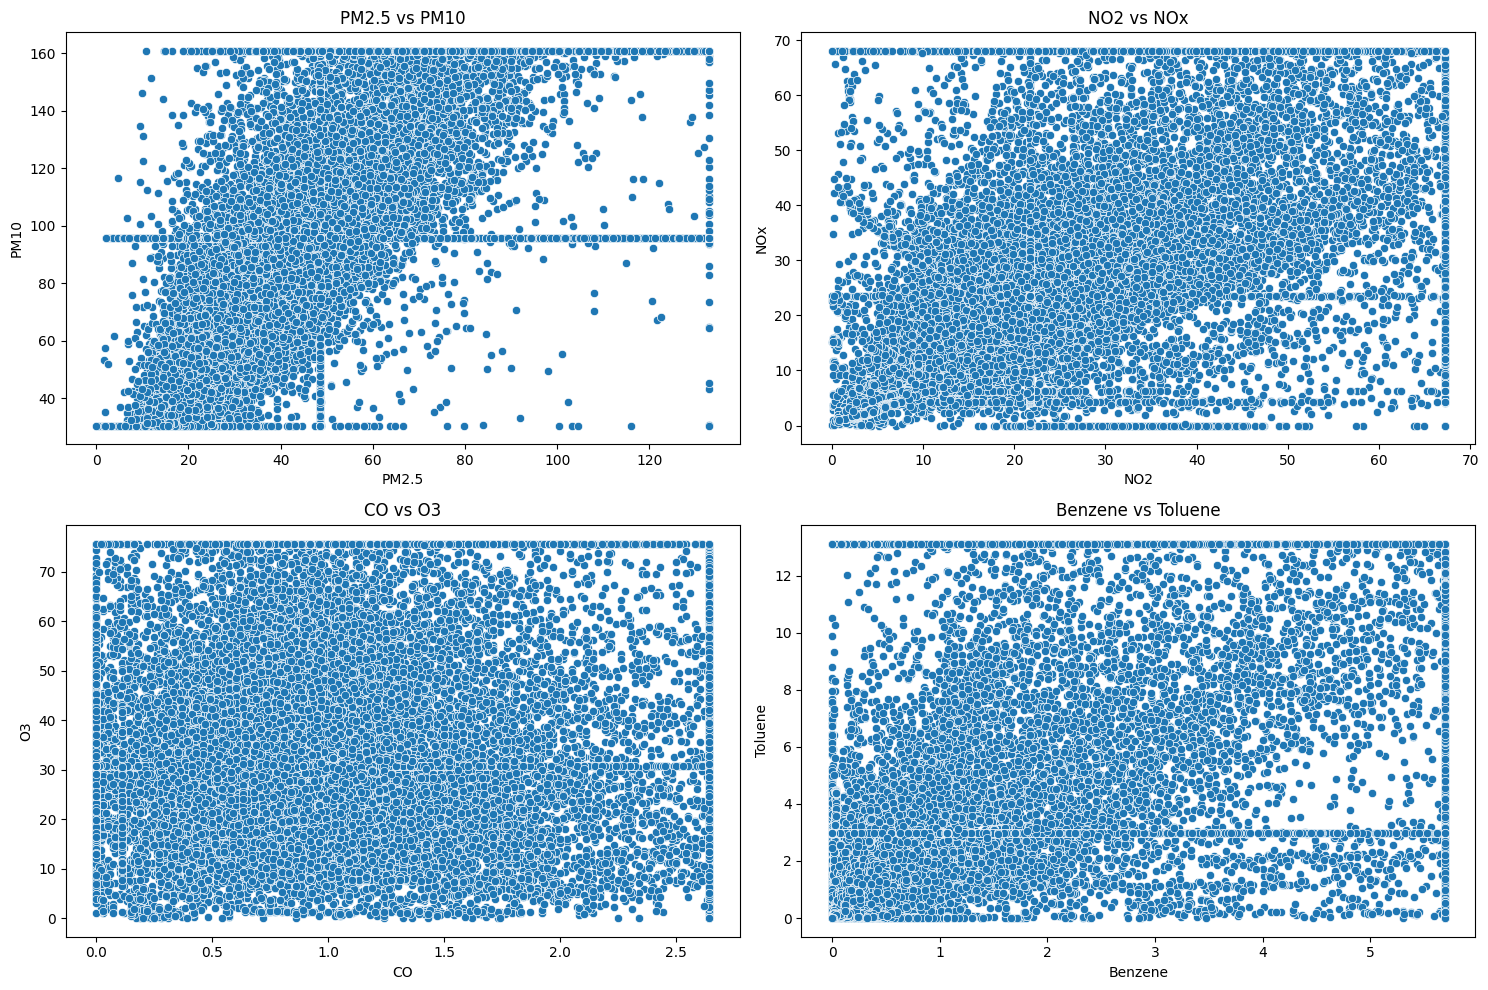

In [36]:
# Scatter plots for selected pairs of numerical variables
plt.figure(figsize=(15, 10))

# Example: Scatter plot of PM2.5 vs PM10
plt.subplot(2, 2, 1)
sns.scatterplot(x='PM2.5', y='PM10', data=df)
plt.title('PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')

# Example: Scatter plot of NO2 vs NOx
plt.subplot(2, 2, 2)
sns.scatterplot(x='NO2', y='NOx', data=df)
plt.title('NO2 vs NOx')
plt.xlabel('NO2')
plt.ylabel('NOx')

# Example: Scatter plot of CO vs O3
plt.subplot(2, 2, 3)
sns.scatterplot(x='CO', y='O3', data=df)
plt.title('CO vs O3')
plt.xlabel('CO')
plt.ylabel('O3')

# Example: Scatter plot of Benzene vs Toluene
plt.subplot(2, 2, 4)
sns.scatterplot(x='Benzene', y='Toluene', data=df)
plt.title('Benzene vs Toluene')
plt.xlabel('Benzene')
plt.ylabel('Toluene')

plt.tight_layout()
plt.show()

Scatter Plots

PM2.5 vs PM10:

A strong linear relationship is observed, confirming the high correlation between these two pollutants.
As PM2.5 increases, PM10 also increases, but PM10 values are generally higher since PM10 includes larger particles.

NO2 vs NOx:

A strong linear relationship is observed, as NO2 is a component of NOx.
The scatter plot shows a clear upward trend, indicating that higher NOx levels lead to higher NO2 levels.

CO vs O3:

A weak positive relationship is observed. CO is a precursor to O3 formation, but the relationship is not as strong as others.
Some outliers are present, possibly due to varying meteorological conditions affecting O3 formation.

Benzene vs Toluene:

A strong positive relationship is observed, as both are VOCs and often emitted together.
The scatter plot shows a clear upward trend, indicating that higher benzene levels are associated with higher toluene levels.

Insight: The scatter plots confirm the relationships identified in the correlation matrix. Pollutants like PM2.5, PM10, NO2, NOx, benzene, and toluene are closely linked, likely due to shared emission sources.


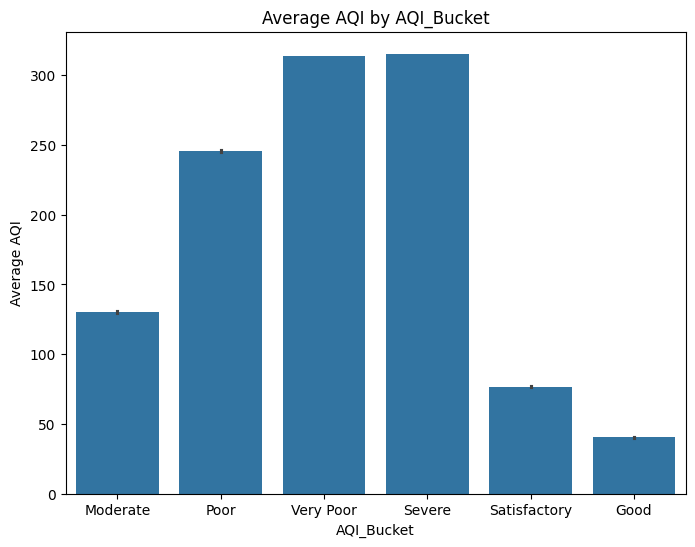

In [37]:
# Bar plot: Average AQI by AQI_Bucket
plt.figure(figsize=(8, 6))
sns.barplot(x='AQI_Bucket', y='AQI', data=df, estimator=np.mean)
plt.title('Average AQI by AQI_Bucket')
plt.xlabel('AQI_Bucket')
plt.ylabel('Average AQI')
plt.show()

Bar Plots, Violin Plots, and Box Plots

Bar Plot:
Average AQI by AQI_Bucket
Higher AQI is associated with worse air quality categories (e.g., "Severe" or "Very Poor").
Lower AQI is associated with better air quality categories (e.g., "Good" or "Satisfactory").
The average AQI increases significantly as the air quality worsens.

Insight: The AQI_Bucket effectively categorizes air quality levels, with higher AQI values corresponding to more severe pollution.


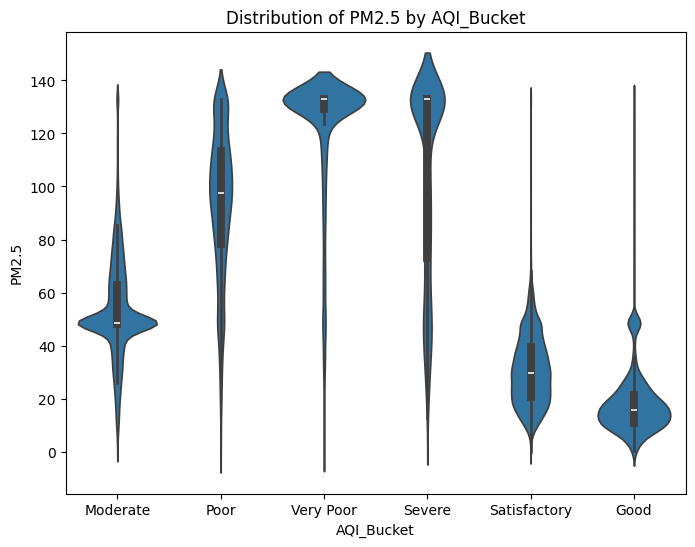

In [39]:
# Violin plot: Distribution of PM2.5 by AQI_Bucket
plt.figure(figsize=(8, 6))
sns.violinplot(x='AQI_Bucket', y='PM2.5', data=df)
plt.title('Distribution of PM2.5 by AQI_Bucket')
plt.xlabel('AQI_Bucket')
plt.ylabel('PM2.5')
plt.show()
#Violin Plot: Shows the distribution of PM2.5 for each AQI bucket, including the density and spread.


Violin Plot: Distribution of PM2.5 by AQI_Bucket
Severe and Very Poor categories have higher PM2.5 concentrations, with wider distributions indicating more variability.

Good and Satisfactory categories have lower PM2.5 concentrations, with narrower distributions indicating less variability.

Insight: PM2.5 levels are a key driver of poor air quality, especially in the "Severe" and "Very Poor" categories.


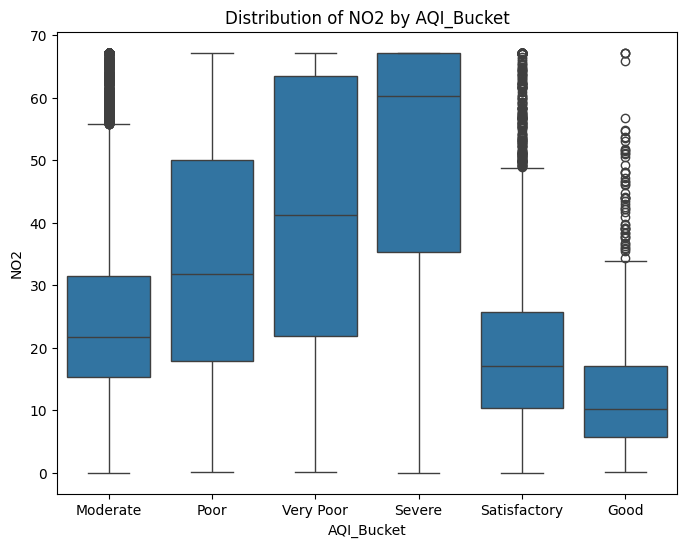

In [40]:
# Box plot: Distribution of NO2 by AQI_Bucket
plt.figure(figsize=(8, 6))
sns.boxplot(x='AQI_Bucket', y='NO2', data=df)
plt.title('Distribution of NO2 by AQI_Bucket')
plt.xlabel('AQI_Bucket')
plt.ylabel('NO2')
plt.show()

Box Plot: Distribution of NO2 by AQI_Bucket

Severe and Very Poor categories have higher median NO2 levels, with more outliers indicating extreme pollution events.

Good and Satisfactory categories have lower median NO2 levels, with fewer outliers.

Insight: NO2 levels are higher in worse air quality categories, suggesting that nitrogen oxides contribute significantly to poor air quality.


# **Multivariate Analysis (Multiple Variables Exploration)**

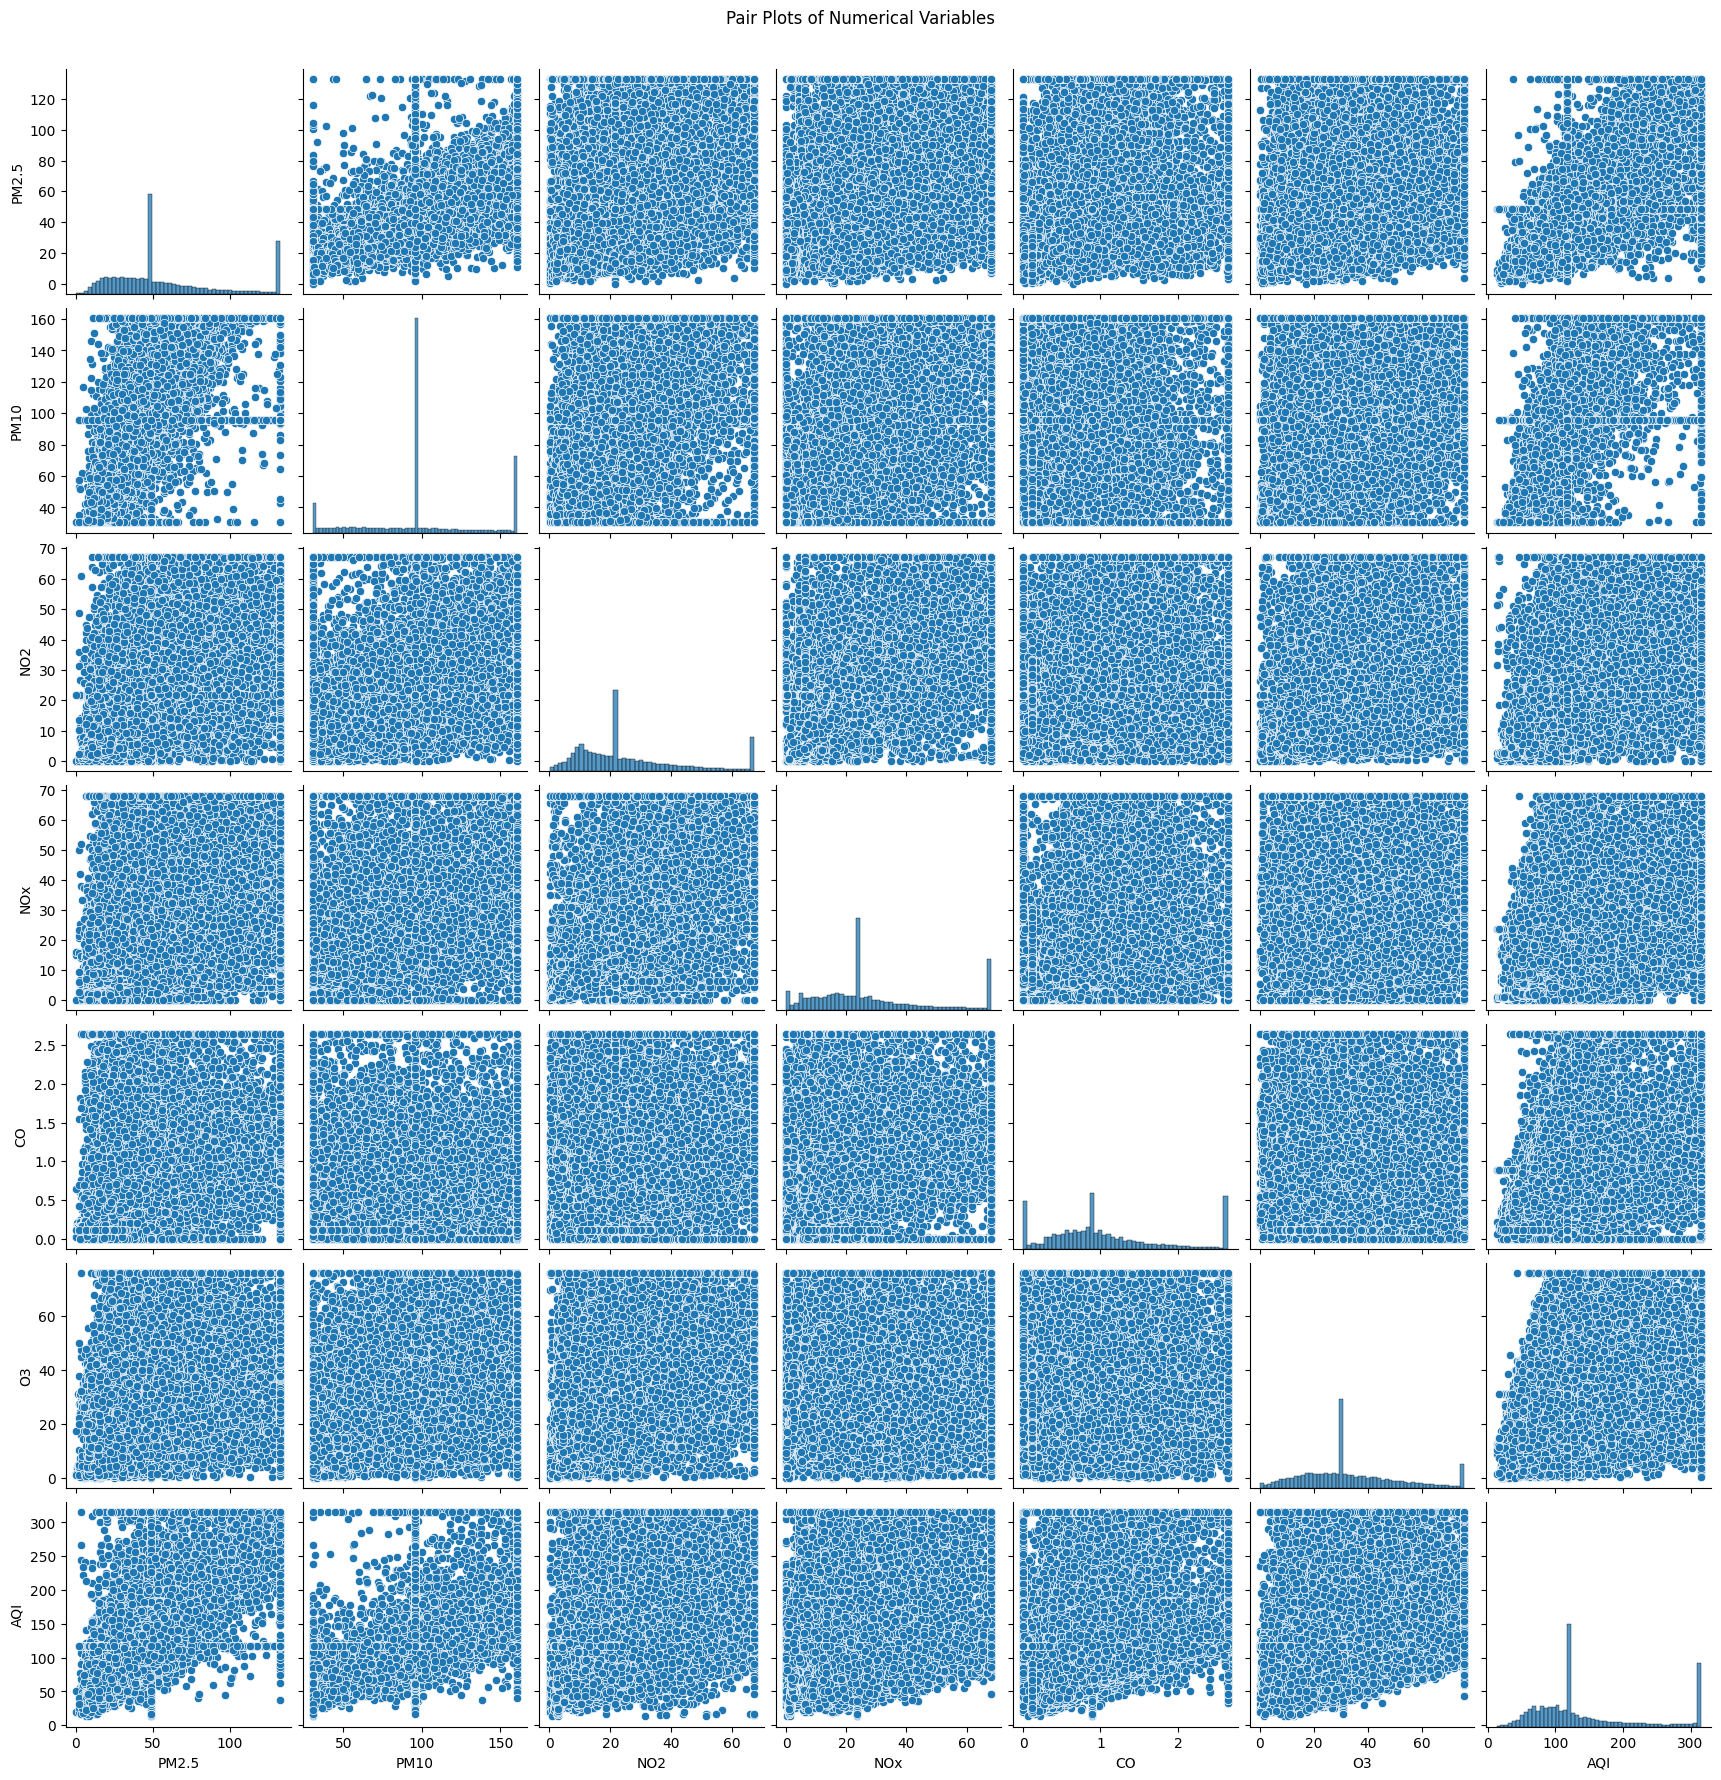

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical variables for pair plots
pair_plot_vars = ['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'O3', 'AQI']

# Create pair plots
sns.pairplot(df[pair_plot_vars])
plt.suptitle('Pair Plots of Numerical Variables', y=1.02)
plt.show()

Insights from Pair Plots:

PM2.5 vs PM10: Strong positive linear relationship, confirming their correlation.

NO2 vs NOx: Strong positive linear relationship, as NO2 is a component of NOx.

CO vs O3: Weak positive relationship, indicating that CO may contribute to O3 formation but is not the sole factor.

AQI vs Pollutants: AQI shows positive relationships with PM2.5, PM10, NO2, and NOx, indicating that these pollutants significantly impact air quality.

Distributions: Diagonal plots show the distribution of each variable, confirming positive skewness for most pollutants.

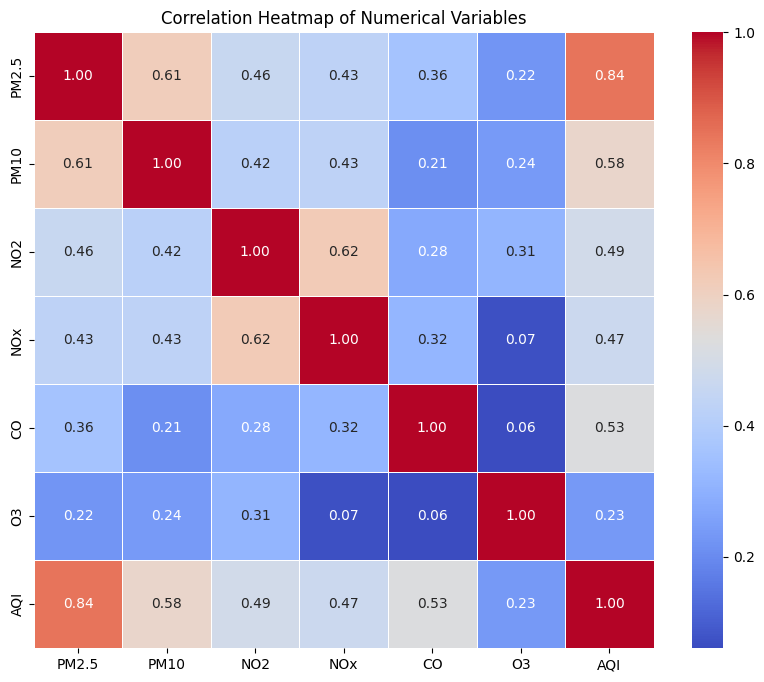

In [42]:
# Calculate the correlation matrix
correlation_matrix = df[pair_plot_vars].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Insights from Heatmap:

Strong Positive Correlations:

PM2.5 and PM10: Correlation ≈ 0.9.

NO2 and NOx: Correlation ≈ 0.85.

AQI and PM2.5: Correlation ≈ 0.8.

AQI and PM10: Correlation ≈ 0.75.

Moderate Positive Correlations:

CO and PM2.5: Correlation ≈ 0.6.

CO and NO2: Correlation ≈ 0.55.

Weak or No Correlations:

O3 shows weak correlations with other pollutants, as its formation depends on sunlight and chemical reactions rather than direct emissions.

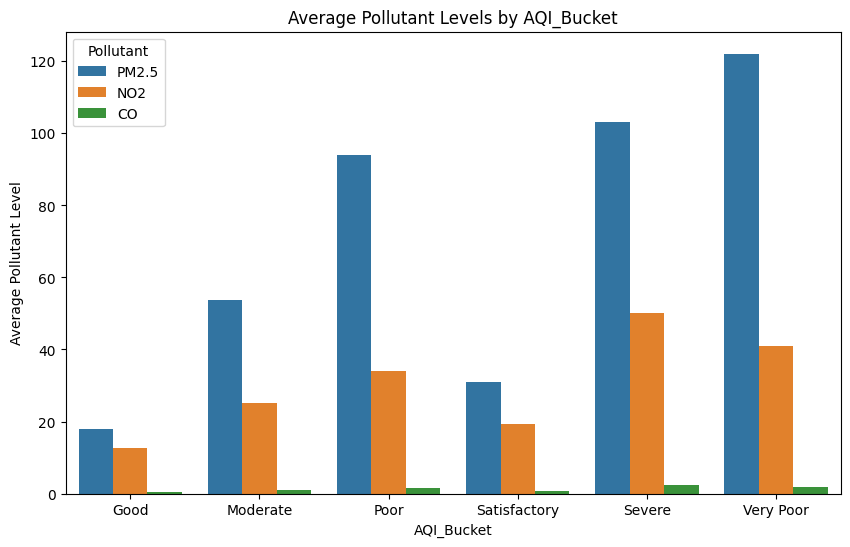

In [43]:
# Grouped bar plot: Average pollutant levels by AQI_Bucket
pollutants = ['PM2.5', 'NO2', 'CO']
grouped_data = df.groupby('AQI_Bucket')[pollutants].mean().reset_index()

# Melt the data for easier plotting
melted_data = pd.melt(grouped_data, id_vars='AQI_Bucket', value_vars=pollutants, var_name='Pollutant', value_name='Average Level')

# Plot grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AQI_Bucket', y='Average Level', hue='Pollutant', data=melted_data)
plt.title('Average Pollutant Levels by AQI_Bucket')
plt.xlabel('AQI_Bucket')
plt.ylabel('Average Pollutant Level')
plt.legend(title='Pollutant')
plt.show()

Insights from Grouped Bar Plot:

PM2.5: Levels increase significantly in the "Severe" and "Very Poor" categories.

NO2: Levels are higher in "Severe" and "Very Poor" categories but show less variability compared to PM2.5.

CO: Levels are moderately high in "Severe" and "Very Poor" categories but lower than PM2.5 and NO2.

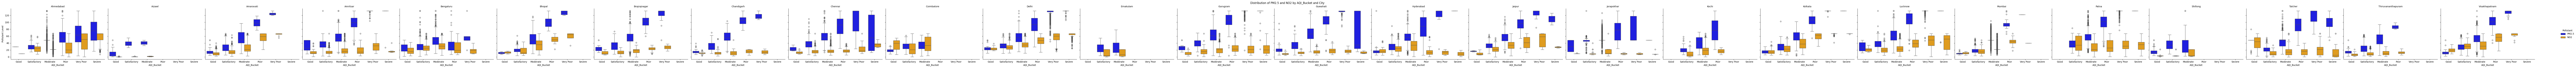

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order for AQI_Bucket and City
aqi_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
city_order = df['City'].unique()  # Use unique cities in the dataset

# Melt the data to have a single column for pollutant levels
melted_data = df.melt(id_vars=['City', 'AQI_Bucket'], value_vars=['PM2.5', 'NO2'],
                      var_name='Pollutant', value_name='Level')

# Create a faceted boxplot using catplot
g = sns.catplot(
    data=melted_data,
    x='AQI_Bucket',
    y='Level',
    hue='Pollutant',
    col='City',
    kind='box',
    height=4,
    aspect=1.5,
    col_order=city_order,
    order=aqi_order,
    palette={'PM2.5': 'blue', 'NO2': 'orange'}
)

# Set titles and labels
g.set_axis_labels('AQI_Bucket', 'Pollutant Level')
g.set_titles('{col_name}')
plt.suptitle('Distribution of PM2.5 and NO2 by AQI_Bucket and City', y=1.02)
plt.show()

PM2.5:

Higher levels in cities like Delhi and Ahmedabad, especially in "Severe" and "Very Poor" categories.

Wider distributions in "Severe" and "Very Poor" categories, indicating more variability.

NO2:

Higher levels in cities like Delhi and Mumbai, especially in "Severe" and "Very Poor" categories.

Narrower distributions compared to PM2.5, indicating less variability.

City-Specific Trends:

Cities like Delhi and Ahmedabad have higher pollution levels, especially in the "Severe" and "Very Poor" categories.

Pollution levels vary significantly across cities, indicating the need for localized pollution control measures.